# TASK 0
## Familiarizing with the dataset

In [1]:
import numpy as np
from scipy.stats import skew
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

n = 400

#fetching the data
data = fetch_olivetti_faces()
print(data.DESCR)

print("Shape of dataset: ", data.data.shape)
print("Shape of images in the dataset: ", data.images.shape)
data = data.images

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (w

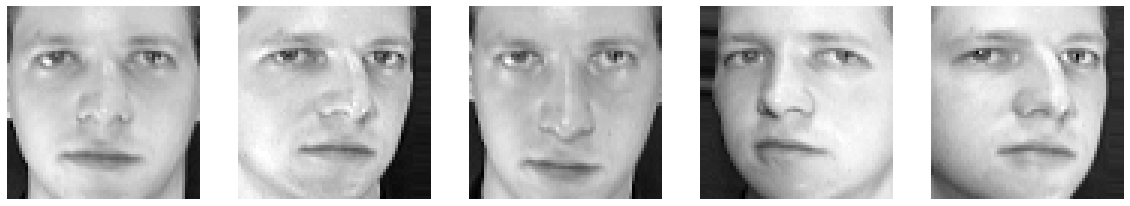

In [2]:
#display first 5 images
fig = plt.figure(figsize=(20, 8))
columns = 5
rows = 1
for i in range(1, columns*rows +1):
    img = data[i-1]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

# TASK 1
## 1.1 Color moments, CM8x8: Split the image into 8x8 windows, compute color moments for each window, and concatenate these color moments to obtain a unified feature descriptor.

Mean values of the 64 8X8 windows result into a matrix of shape 8x8:
$$ Mean(\overline{x}) = \frac{1}{n} \sum_{i=i}^{n} x_{i}  $$

Standard Deviation values of the 64 8X8 windows result into a matrix of shape 8x8:
$$ Standard Deviation(\sigma) = \sqrt {\frac{1}{n}\sum\limits_{i = 1}^n {\left( {x_i - \bar x} \right)^2 } }  $$

Skewness values of the 64 8X8 windows result into a matrix of shape 8x8:
$$ Skewness(\gamma_1) = \frac{{\mu _3 }}{{\mu_2 ^{3 /2}}}  = \frac{{\mu _3 }}{{\sigma ^3 }}  $$

Hence, we get 8 x 8 x 3 (For Mean, Standard Deviation, Skewness) matrix for each image.

In [3]:
#slicing the image into 8x8 grids
def slice_channel(channel):
    slices = []
    r = 0
    while r < channel.shape[0]:
        c = 0
        while c < channel.shape[1]:
            channel_slice = channel[r:r + 8, c:c + 8]
            slices.append(channel_slice)
            c = c + 8
        r = r + 8
    return slices

#Calculating color moments: Mean, Standard deviation, Skewness
def ColorMoments(data):
  Outernew = []
  InnerTemp = []
  for each in data:

    each = slice_channel(each)
    
    for ea in each:
      InnerTemp.append([np.mean(ea), np.std(ea), skew(ea.reshape(64))])
    Outernew.append(InnerTemp)
    InnerTemp = []

  colorMoments = np.array(Outernew).reshape((np.array(data).shape[0], 8, 8, 3))
  return colorMoments

#OUTPUT of Color Moments for the original dataset of 400 images
task1output = ColorMoments(data)

print("Number of images: ", task1output.shape[0])
print("Shape of square matrix: ", task1output.shape[1], "x", task1output.shape[2])
print("Number of color moments: ", task1output.shape[3])

Number of images:  400
Shape of square matrix:  8 x 8
Number of color moments:  3


## 1.2 Calculate Local Binary Pattern for each image

(400, 256)


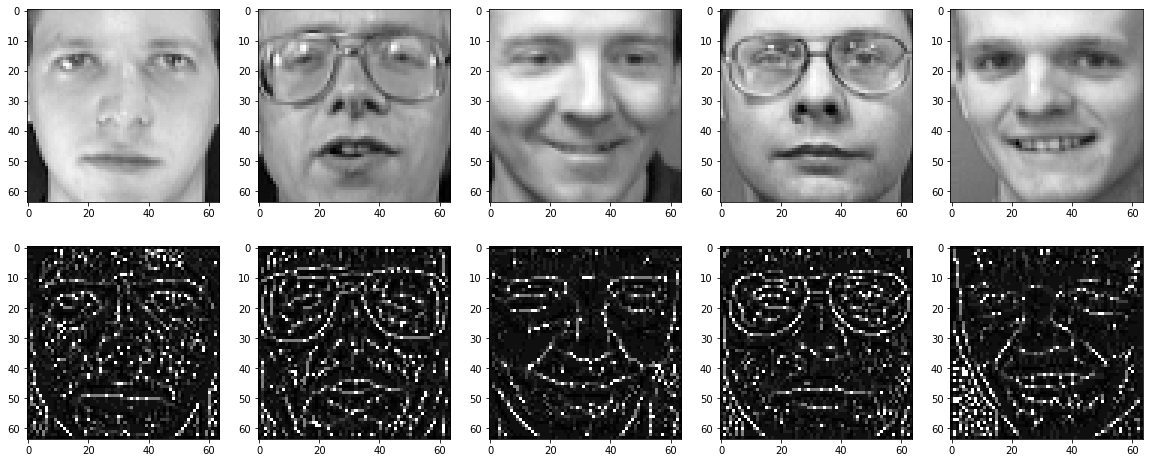

In [4]:
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

#Visualizing the LBP images
lbp1 = local_binary_pattern(data[0], 8, 1, 'ror')
lbp2 = local_binary_pattern(data[10], 8, 1, 'ror')
lbp3 = local_binary_pattern(data[20], 8, 1, 'ror')
lbp4 = local_binary_pattern(data[30], 8, 1, 'ror')
lbp5 = local_binary_pattern(data[40], 8, 1, 'ror')

fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

ax_img[0].imshow(data[0], cmap='gray')
ax_img[1].imshow(data[10], cmap='gray')
ax_img[2].imshow(data[20], cmap='gray')
ax_img[3].imshow(data[30], cmap='gray')
ax_img[4].imshow(data[40], cmap='gray')
ax_hist[0].imshow(lbp1, cmap='gray')
ax_hist[1].imshow(lbp2, cmap='gray')
ax_hist[2].imshow(lbp3, cmap='gray')
ax_hist[3].imshow(lbp4, cmap='gray')
ax_hist[4].imshow(lbp5, cmap='gray')

#Getting the features given an array comprising arrays of images
def localBinPattern(data):
  lbp_features = []

  for each in data:
    lbp = local_binary_pattern(each, 8, 1, 'ror')
    hist, edges = np.histogram(lbp, bins = 256, range = (0.0,255.0))
    hist = hist.astype("float")
    hist = hist/(hist.sum() + 1e-7)
    lbp_features.append(hist.tolist())

  # print("Shape of LBP features of all images in the folder: ", np.array(lbp_features).shape)
  # print("LBP features of first image: ", lbp_features[0])
  return np.array(lbp_features)

#printing the LBP features of original dataset of 400 images
print(localBinPattern(data).shape)

## 1.3 Histogram Oriented Gradient for images

(400, 1764)


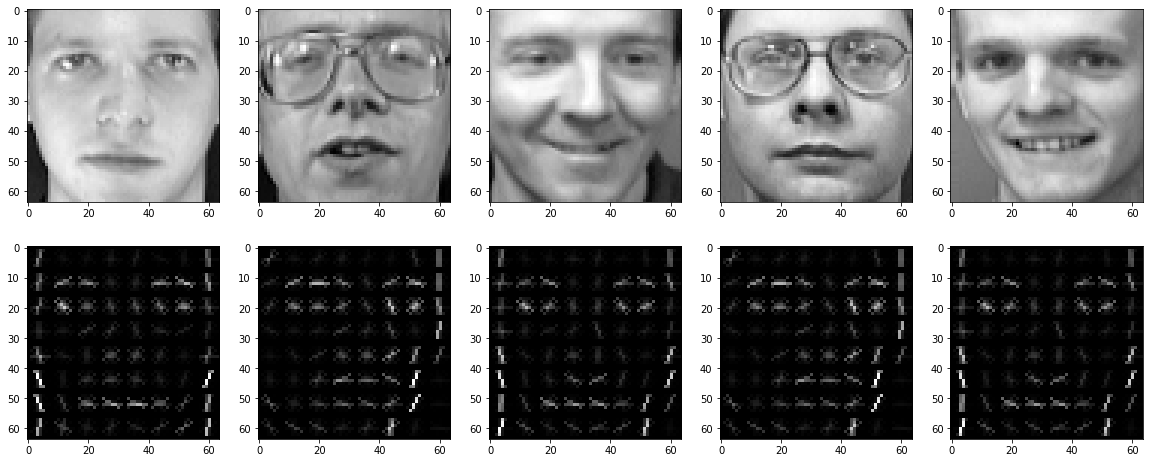

In [5]:
from skimage.feature import hog
from skimage import exposure

#Visualizing the HOG images
fd, hog_image = hog(data[0], pixels_per_cell=(8, 8), orientations=9,
                    cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
hog_image_rescaled1 = exposure.rescale_intensity(hog_image, in_range=(0, 10))

fd, hog_image = hog(data[1], pixels_per_cell=(8, 8), orientations=9,
                    cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
hog_image_rescaled2 = exposure.rescale_intensity(hog_image, in_range=(0, 10))

fd, hog_image = hog(data[2], pixels_per_cell=(8, 8), orientations=9,
                    cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
hog_image_rescaled3 = exposure.rescale_intensity(hog_image, in_range=(0, 10))

fd, hog_image = hog(data[1], pixels_per_cell=(8, 8), orientations=9,
                    cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
hog_image_rescaled4 = exposure.rescale_intensity(hog_image, in_range=(0, 10))

fd, hog_image = hog(data[2], pixels_per_cell=(8, 8), orientations=9,
                    cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
hog_image_rescaled5 = exposure.rescale_intensity(hog_image, in_range=(0, 10))

fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

ax_img[0].imshow(data[0], cmap='gray')
ax_img[1].imshow(data[10], cmap='gray')
ax_img[2].imshow(data[20], cmap='gray')
ax_img[3].imshow(data[30], cmap='gray')
ax_img[4].imshow(data[40], cmap='gray')
ax_hist[0].imshow(hog_image_rescaled1, cmap='gray')
ax_hist[1].imshow(hog_image_rescaled2, cmap='gray')
ax_hist[2].imshow(hog_image_rescaled3, cmap='gray')
ax_hist[3].imshow(hog_image_rescaled4, cmap='gray')
ax_hist[4].imshow(hog_image_rescaled5, cmap='gray')

#Getting the HOG features given an array comprising arrays of images
def histOrientedGrad(data):
  hog_features=[]
  hog_rescaled=[]
  for img in data:
      fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
      
      hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
      hog_features.append(fd)
      hog_rescaled.append(hog_image_rescaled)

  return np.array(hog_features)

#printing the HOG features of original dataset of 400 images
print(histOrientedGrad(data).shape)

## FINAL FUNCTION FOR TASK 1

In [6]:
#The overall function for TASK 1
## Input: (path of the image, function of the model you want to use)
## Output: TASK1.txt file containing the features of the image
from keras.preprocessing import image

def TASK1(img_path, model):
  img = image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
  img = image.img_to_array(img).reshape((64,64))
  features = model([img])
  f = open("TASK1"+".txt","w+")
  f.write("Image "+str(img_path)+" :\n")
  f.write(str(model)+" :\n")
  np.savetxt(f, features.flatten())
  f.close()

#Task2 function call
TASK1('image-0.png', ColorMoments)

# TASK 2
## Implement a program which, given a folder with images, extracts and stores feature descriptors for all the images in the folder.

In [7]:
#Reinitializing the original dataset
data = fetch_olivetti_faces()
data = data.images

In [8]:
import zipfile
import shutil

#Unzipping the Test data into folder "images"

try:
  shutil.rmtree('images')
except:
  pass

with zipfile.ZipFile('test_imgage_sets.zip', 'r') as zip_ref:
    zip_ref.extractall('images')

In [9]:
import os
folder_path = 'images'
sets = [set for set in sorted(os.listdir(folder_path)) if set[0]!='_']
print(sets)

['set1', 'set2', 'set3']


In [10]:
from keras.preprocessing import image

#Converting the test images into arrays
# all_data will contain the subfolders images' arrays
all_data = []
for set in sets:
  path = 'images/' + set + '/'
  images = sorted(os.listdir(path))
  temp = []
  for i in images:
    img = image.load_img(path+i, target_size=(64, 64), color_mode='grayscale')
    x = image.img_to_array(img).reshape((64,64))
    temp.append(x)
  all_data.append(temp)
print("Shape of sets: ", np.array(all_data[0]).shape, np.array(all_data[1]).shape, np.array(all_data[2]).shape)

Shape of sets:  (10, 64, 64) (10, 64, 64) (13, 64, 64)


In [11]:
#Storing the features of all images using all 3 models and saving into .txt file in each subfolder
color_moments = []
lbp_feature_desc = []
hog_feature_desc = []

def TASK2(all_data):
  for data in all_data:
    cm = ColorMoments(data)
    color_moments.append(cm)
    lbpfeatures = localBinPattern(data)
    lbp_feature_desc.append(lbpfeatures)
    hogfeatures = histOrientedGrad(data)
    hog_feature_desc.append(hogfeatures)

  print("Shape of the features for set1: ", "\nColor moments features:", np.array(color_moments[0], dtype=object).shape, "\nLocal binary patterns features:", np.array(lbp_feature_desc[0], dtype=object).shape, "\nHistogram of oriented gradients features:", np.array(hog_feature_desc[0], dtype=object).shape)

  #Saving the features into .txt file
  for s in range(len(sets)):
    path = 'images/' + sets[s] + '/'
    images = sorted(os.listdir(path))
    f = open(path + "TASK2outputFeatures"+".txt","w+")
    for o in range(len(color_moments[s])):
      f.write("Image "+images[o]+" :\n")
      f.write("Color moments [Mean, Standard deviation, Skewness]: (Shape:"+str(color_moments[s][o].shape)+") \n" + str(color_moments[s][o]) + "\n")
      f.write("\nLBP feature values: (Shape:"+str(np.array(lbp_feature_desc[s][o]).shape)+") \n" + str(lbp_feature_desc[s][o]) + "\n")
      f.write("\nHOG feature values: (Shape:"+str(np.array(hog_feature_desc[s][o]).shape)+") \n" + str(hog_feature_desc[s][o]) + "\n\n")

TASK2(all_data)

Shape of the features for set1:  
Color moments features: (10, 8, 8, 3) 
Local binary patterns features: (10, 256) 
Histogram of oriented gradients features: (10, 1764)


# TASK 3
## Implement a program which, given a folder with images and an image ID, a model, and a value “k”, returns and visualizes the most similar k images based on the corresponding visual descriptors. For each match, also list the overall matching score.

In [12]:
import os
from scipy.spatial import distance
from scipy.stats import wasserstein_distance

#Main function to find the k nearest images to the given image
#Input: Path to the folder containing the images, Base image to be comapared, Model to use for comparison, Number of nearest images to find
#Output: An array containing tuples in the format: (1st nearest image: Its distance to the base image), (2nd nearest image: Its distance to the base image), ..., (k-th nearest image: Its distance to the base image)
def k_nearest(folder_path, img_id, model, k):
  all_images = sorted(os.listdir(folder_path))
  img = image.load_img(folder_path+'/'+img_id, target_size=(64, 64), color_mode='grayscale')
  img = image.img_to_array(img).reshape((64,64))
  base = model([img]).flatten()
  
  #To store the visual descriptors of the images in the folder
  vis_desc = {}
  for each_image in all_images:
    if each_image[-4:]=='.png':
      temp = image.load_img(folder_path+'/'+each_image, target_size=(64, 64), color_mode='grayscale')
      temp = image.img_to_array(temp).reshape((64,64))
      vis_desc[each_image] = model([temp]).flatten()
  
  #Dictionary to store the distances between base image and all other images
  dist={}

  #Defining the distance function for finding the distance between the images
  distance_function = wasserstein_distance    #Earth movers distance

  #Using the Cosine similarity for local binary pattern model to obtain better results
  if str(model).split(" ")[1]=='localBinPattern':
    #dist[key] = np.linalg.norm(base - v)   #Euclidean distance
    distance_function = distance.cosine    #Cosine similarity

  #Calculating the distances and storing them into a dictionary
  for key, v in list(vis_desc.items()):
    #dist[key] = np.linalg.norm(base - v)   #Euclidean distance
    dist[key] = distance_function(base, v) 

  k_images = list(dist.keys())
  k_dist = list(dist.values())

  #Taking the first k images from the folder nearest to the base model (Ignoring the first result as it will be the base image with zero distance)
  res = sorted(k_dist)[1:k+1]

  k_imageids = [k_dist.index(i) for i in res]
  k_imageids = [(k_images[i], k_dist[i]) for i in k_imageids]

  #Visualizing the k nearest images
  fig = plt.figure(figsize=(20, 8))
  columns = k
  rows = 1
  for index, i in enumerate(res):
      temp = image.load_img(folder_path+'/'+k_images[k_dist.index(i)], target_size=(64, 64), color_mode='grayscale')
      temp = image.img_to_array(temp).reshape((64,64))
      fig.add_subplot(rows, columns, index+1)
      plt.axis('off')
      plt.imshow(temp, cmap='gray')
  plt.show()

  return k_imageids


In [13]:
#Final function for TASK3
def TASK3(path, image_id, model, k):
  image_ids = k_nearest(path, image_id, model, k)

  #Outputting the results into the folder as a text (.txt) file
  f = open(path + "TASK3KNearest"+ str(model).split(" ")[1] +".txt","w+")
  for i in range(len(image_ids)):
    f.write("Distance between "+ image_id+" and " + str(image_ids[i][0])+" : "+str(image_ids[i][1])+"\n")
  f.close()

  return image_ids

Set1 -> image0.png -> COLOR MOMENTS -> k=4


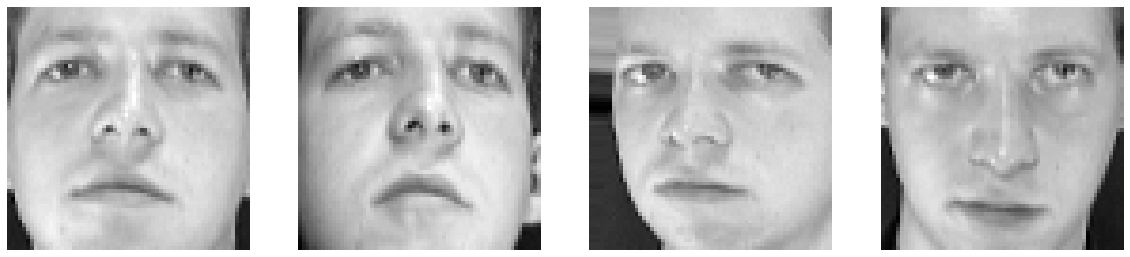

Distance to the image-0.png:  [('image-6.png', 3.1518124549911577), ('image-8.png', 3.602674520787937), ('image-5.png', 3.9388552071807985), ('image-2.png', 4.2301603883727985)]

Set1 -> image0.png -> EXTENDED LOCAL BINARY PATTERNS -> k=4


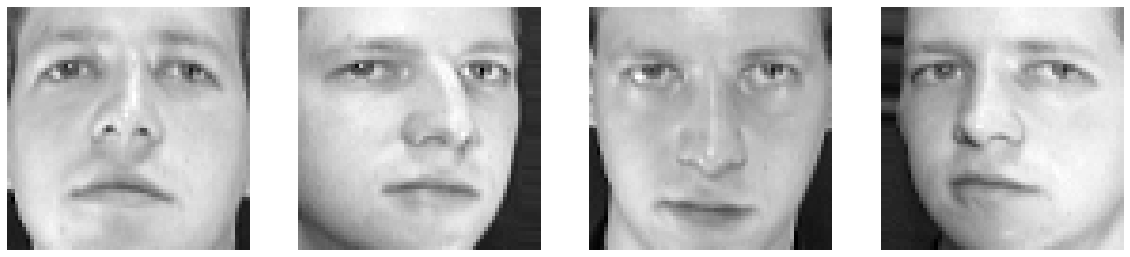

Distance to the image-0.png:  [('image-6.png', 0.0010354764268099004), ('image-4.png', 0.0023070519628869413), ('image-2.png', 0.002967292441420022), ('image-3.png', 0.0029896889204839017)]

Set1 -> image0.png -> HISTOGRAM ORIENTED GRADIENTS -> k=4


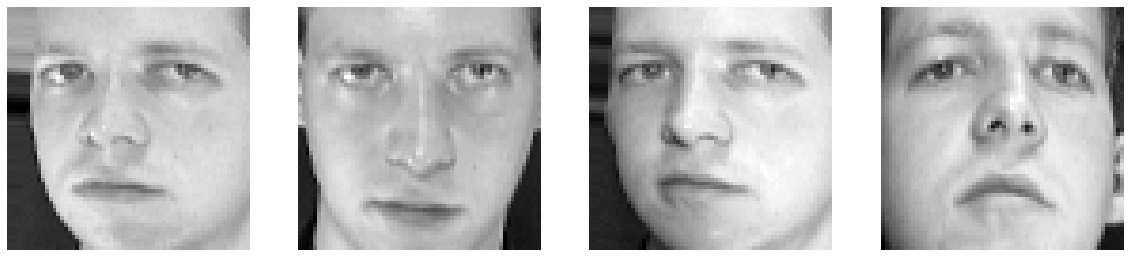

Distance to the image-0.png:  [('image-5.png', 0.004424375571885826), ('image-2.png', 0.005033065415461765), ('image-3.png', 0.00637070997473491), ('image-8.png', 0.006404599830708055)]


In [14]:
#Calling the function defined above to find the k nearest images using COLOR MOMENTS as the model
#Inputs: path, image name, k, model
#Output: Writes a text file in the folder specified that contains the feature descriptors of all images in that folder
#Function call
print("Set1 -> image0.png -> COLOR MOMENTS -> k=4")
print("Distance to the image-0.png: ", TASK3('images/set1/', 'image-0.png', ColorMoments, 4))

print("\nSet1 -> image0.png -> EXTENDED LOCAL BINARY PATTERNS -> k=4")
print("Distance to the image-0.png: ", TASK3('images/set1/', 'image-0.png', localBinPattern, 4))

print("\nSet1 -> image0.png -> HISTOGRAM ORIENTED GRADIENTS -> k=4")
print("Distance to the image-0.png: ", TASK3('images/set1/', 'image-0.png', histOrientedGrad, 4))

Set2 -> image0.png -> COLOR MOMENTS -> k=4


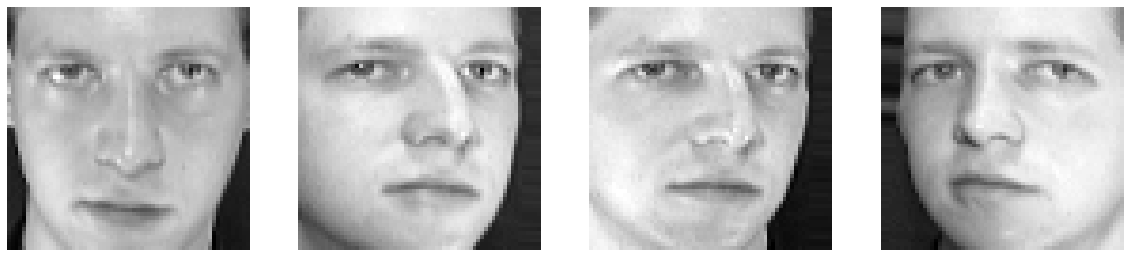

Distance to the image-0.png:  [('image-2.png', 4.2301603883727985), ('image-4.png', 4.892928304747328), ('image-1.png', 6.065992517256138), ('image-3.png', 9.014437568256955)]

Set2 -> image0.png -> EXTENDED LOCAL BINARY PATTERNS -> k=4


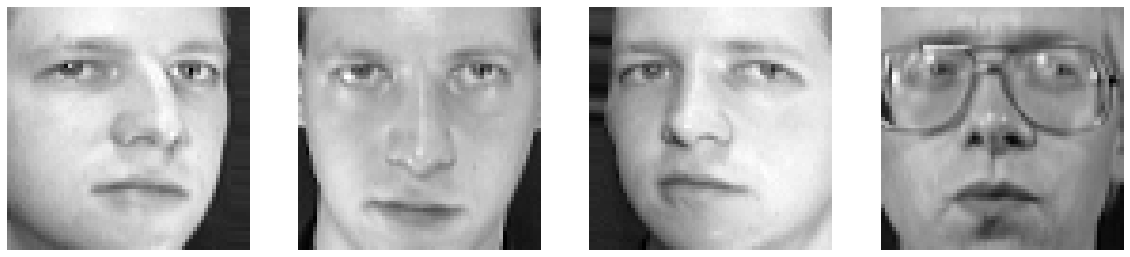

Distance to the image-0.png:  [('image-4.png', 0.0023070519628869413), ('image-2.png', 0.002967292441420022), ('image-3.png', 0.0029896889204839017), ('image-12.png', 0.003106052663507608)]

Set2 -> image0.png -> HISTOGRAM ORIENTED GRADIENTS -> k=4


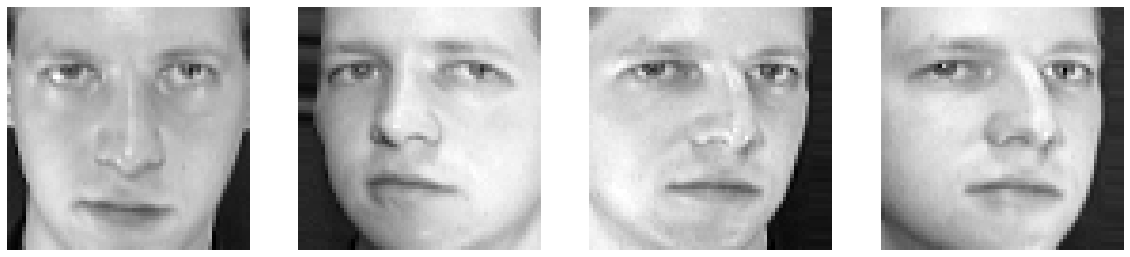

Distance to the image-0.png:  [('image-2.png', 0.005033065415461765), ('image-3.png', 0.00637070997473491), ('image-1.png', 0.006919707463150785), ('image-4.png', 0.011135897654372489)]


In [15]:
print("Set2 -> image0.png -> COLOR MOMENTS -> k=4")
print("Distance to the image-0.png: ", TASK3('images/set2/', 'image-0.png', ColorMoments, 4))

print("\nSet2 -> image0.png -> EXTENDED LOCAL BINARY PATTERNS -> k=4")
print("Distance to the image-0.png: ", TASK3('images/set2/', 'image-0.png', localBinPattern, 4))

print("\nSet2 -> image0.png -> HISTOGRAM ORIENTED GRADIENTS -> k=4")
print("Distance to the image-0.png: ", TASK3('images/set2/', 'image-0.png', histOrientedGrad, 4))

Set3 -> image0.png -> COLOR MOMENTS -> k=4


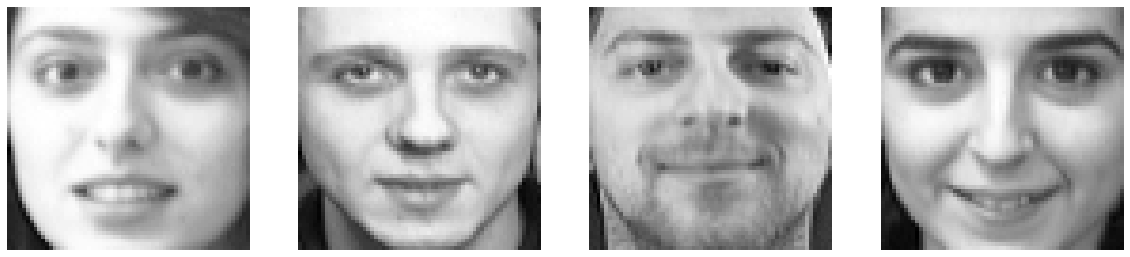

Distance to the image-0.png:  [('image-70.png', 6.3172570824681324), ('image-110.png', 6.859064386599735), ('image-60.png', 8.62059576621565), ('image-90.png', 9.788667465681403)]

Set3 -> image0.png -> EXTENDED LOCAL BINARY PATTERNS -> k=4


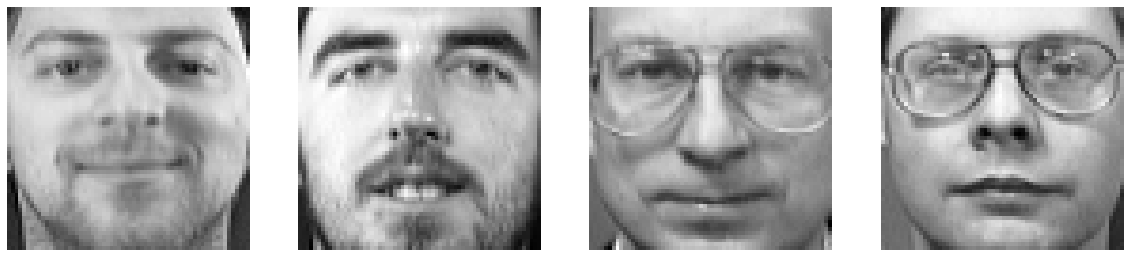

Distance to the image-0.png:  [('image-60.png', 0.001005881525499186), ('image-100.png', 0.0015783417590233828), ('image-120.png', 0.002708620653696814), ('image-30.png', 0.0034603498663681176)]

Set3 -> image0.png -> HISTOGRAM ORIENTED GRADIENTS -> k=4


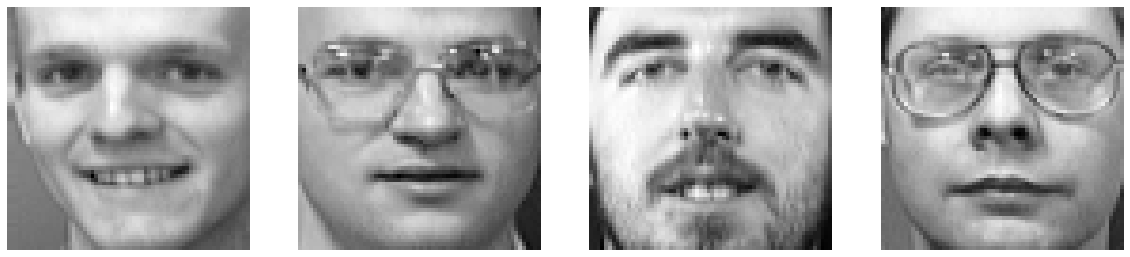

Distance to the image-0.png:  [('image-40.png', 0.006130899930030032), ('image-50.png', 0.007487745525360349), ('image-100.png', 0.008935403464432654), ('image-30.png', 0.010320816117324608)]


In [16]:
print("Set3 -> image0.png -> COLOR MOMENTS -> k=4")
print("Distance to the image-0.png: ", TASK3('images/set3/', 'image-0.png', ColorMoments, 4))

print("\nSet3 -> image0.png -> EXTENDED LOCAL BINARY PATTERNS -> k=4")
print("Distance to the image-0.png: ", TASK3('images/set3/', 'image-0.png', localBinPattern, 4))

print("\nSet3 -> image0.png -> HISTOGRAM ORIENTED GRADIENTS -> k=4")
print("Distance to the image-0.png: ", TASK3('images/set3/', 'image-0.png', histOrientedGrad, 4))

# TASK 4
##  Implement a program which, given a folder with images and an image ID and a value “k”, returns and visualizes the most similar k images based on all corresponding visual descriptors. For each match, also list the overall matching score and the contributions of the individual visual models.

In [17]:
import os
from scipy.spatial import distance
from sklearn import preprocessing
from scipy.stats import wasserstein_distance

#HELPER FUNCTION FOR TASK 4
#Function to find the k nearest images to the given image using combined strength of all three models
#Input: Path to the folder containing the images, Base image to be comapared, Model to use for comparison, Number of nearest images to find
#Output: The dictionary containing the image ids/names in the folder, The dictionary containing the distances of all the images with the base image in the folder
def k_nearest_allmodels(folder_path, img_id, model, k):
  all_images = sorted(os.listdir(folder_path))
  img = image.load_img(folder_path+'/'+img_id, target_size=(64, 64), color_mode='grayscale')
  img = image.img_to_array(img).reshape((64,64))
  base = model([img]).flatten()
  
  #To store the visual descriptors of the images in the folder
  vis_desc = {}
  for each_image in all_images:
    if each_image[-4:]=='.png':
      temp = image.load_img(folder_path+'/'+each_image, target_size=(64, 64), color_mode='grayscale')
      temp = image.img_to_array(temp).reshape((64,64))
      vis_desc[each_image] = model([temp]).flatten()
  
  #Dictionary to store the distances between base image and all other images
  dist={}

  #Defining the distance function for finding the distance between the images
  distance_function = wasserstein_distance    #Earth movers distance

  #Using the Cosine similarity for local binary pattern model to obtain better results
  if str(model).split(" ")[1]=='localBinPattern':
    #dist[key] = np.linalg.norm(base - v)   #Euclidean distance
    distance_function = distance.cosine    #Cosine similarity

  #Calculating the distances and storing them into a dictionary
  for key, v in list(vis_desc.items()):
    #dist[key] = np.linalg.norm(base - v)   #Euclidean distance
    dist[key] = distance_function(base, v)

  k_images = list(dist.keys())
  k_dist = list(dist.values())

  return k_images, k_dist


In [18]:
#MAIN FUNCTION for TASK 4
#Inputs: Path to the folder containing the images, Base image to be comapared, Number of nearest images to find
#Output: Visualizes the k nearest images
def TASK4(folder_path, image_id, k):
  #Weightage to give to the model (IMPORTANCE of the model)
  c_weight = 0.45
  l_weight = 0.1
  h_weight = 0.45

  #Finding the distances using all three models
  k_images, c_dists = k_nearest_allmodels(folder_path, image_id, ColorMoments, k)
  _, l_dists = k_nearest_allmodels(folder_path, image_id, localBinPattern, k)
  _, h_dists = k_nearest_allmodels(folder_path, image_id, histOrientedGrad, k)

  #Normalizing the distances we found so that the distances are on the same scale [0, 1] before calculating the overall distance
  c_dists = preprocessing.normalize(np.array([c_dists]), norm='l2')
  l_dists = preprocessing.normalize(np.array([l_dists]), norm='l2')
  h_dists = preprocessing.normalize(np.array([h_dists]), norm='l2')
  
  #Individual image distances obtained via all 3 models
  individual_dists = [{'Color moments': i[0], 'LBP': i[1], 'HOG':i[2]} for i in zip(c_dists[0], l_dists[0], h_dists[0])]
  
  #Calculating the overall distance using the weightage we assigned to each model: Multiplying the model's decision with the respective weight
  k_dist = [i[0]*c_weight+i[1]*l_weight+i[2]*h_weight for i in zip(c_dists, l_dists, h_dists)]
  
  #Taking the first k images from the folder nearest to the base model (Ignoring the first result as it will be the base image with zero distance)
  res = sorted(k_dist[0])[1:k+1]

  #Printing the individual distance values from the base image of three models for each image
  k_imageids = [list(k_dist[0]).index(i) for i in res]
  k_imageids = [(k_images[i], individual_dists[i]) for i in k_imageids]
  #print("Individual matching scores: ", k_imageids)

  #Printing the overall distance values from the base image for each image
  k_imageids = [list(k_dist[0]).index(i) for i in res]
  k_imageids = [(k_images[i], k_dist[0][i]) for i in k_imageids]
  #print("Overall matching scores: ", k_imageids)

  #Visualizing the k nearest images found using the overall distance obtained using all three models
  fig = plt.figure(figsize=(20, 8))
  columns = k
  rows = 1
  for index, i in enumerate(res):
      temp = image.load_img(folder_path+'/'+k_images[list(k_dist[0]).index(i)], target_size=(64, 64), color_mode='grayscale')
      temp = image.img_to_array(temp).reshape((64,64))
      fig.add_subplot(rows, columns, index+1)
      plt.axis('off')
      plt.imshow(temp, cmap='gray')
  plt.show()

  #Outputting the results into the folder as a text (.txt) file
  f = open(folder_path + "/TASK4outputFeatures"+".txt","w+")
  for i in range(len(k_imageids)):
    f.write("Distance between "+ image_id+" and " + str(k_imageids[i][0])+" : "+str(k_imageids[i][1])+"\n")
  f.close()

  return k_imageids

Set1 -> image0.png -> k=4


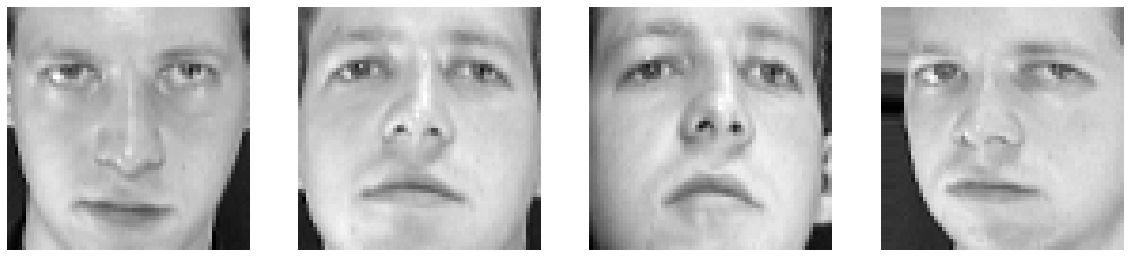

Distance to the image-0.png:  [('image-2.png', 0.2177751201570754), ('image-6.png', 0.23118756174053018), ('image-8.png', 0.2369932438103785), ('image-5.png', 0.24168781096550063)]

Set2 -> image0.png -> k=4


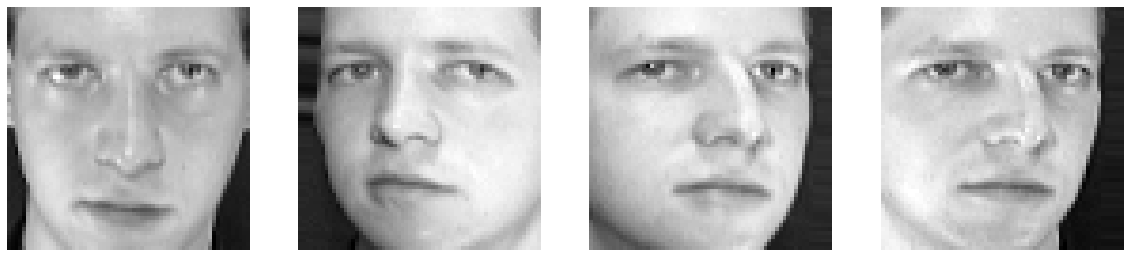

Distance to the image-0.png:  [('image-2.png', 0.13758391730068556), ('image-3.png', 0.21938440523804179), ('image-4.png', 0.2292084891598491), ('image-1.png', 0.2689651837691954)]

Set3 -> image0.png -> k=4


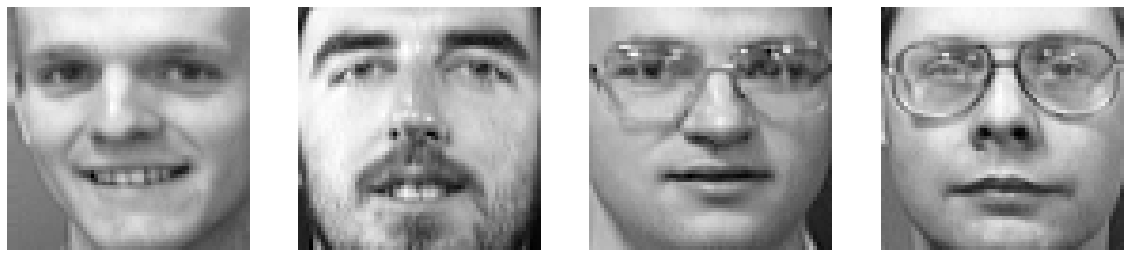

Distance to the image-0.png:  [('image-40.png', 0.2006318320945064), ('image-100.png', 0.20910757685386777), ('image-50.png', 0.24097553823561868), ('image-30.png', 0.2530390444015705)]


In [19]:
print("Set1 -> image0.png -> k=4")
print("Distance to the image-0.png: ", TASK4('images/set1', 'image-0.png', 4))

print("\nSet2 -> image0.png -> k=4")
print("Distance to the image-0.png: ", TASK4('images/set2', 'image-0.png', 4))

print("\nSet3 -> image0.png -> k=4")
print("Distance to the image-0.png: ", TASK4('images/set3', 'image-0.png', 4))